<a href="https://colab.research.google.com/github/amavi-e/machine-learning-coursework/blob/main/MLcoursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Machine_Leaning_Module/bank-additional-full.csv', sep=';')
print(data.head()) # Display first five rows of data set

# Count the number of missing values
print(data.isnull().sum())

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns # Select all columns with datatybe 'object'
encoder = LabelEncoder() # This instance is created to transform categorical labels into integers.
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col]) #: Encodes the column values as integers

# Feature and target split
X = data.drop('y', axis=1)  #Removes the target column (y) from the dataset, leaving only the features.
y = data['y'] #Selects the target column (y) as the labels for classification.

# Train-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

Neural Network Model

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8809 - loss: 0.2822 - val_accuracy: 0.9173 - val_loss: 0.1791
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9066 - loss: 0.2024 - val_accuracy: 0.9176 - val_loss: 0.1793
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9121 - loss: 0.1944 - val_accuracy: 0.9155 - val_loss: 0.1775
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9142 - loss: 0.1933 - val_accuracy: 0.9194 - val_loss: 0.1751
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9119 - loss: 0.1903 - val_accuracy: 0.9196 - val_loss: 0.1744
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9101 - loss: 0.1912 - val_accuracy: 0.9176 - val_loss: 0.1751
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9145 - loss: 0.1892 - val_accuracy: 0.9187 - val_loss: 0.1736
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9127 - loss: 0.1856 - val_accuracy: 0.9155 - val_

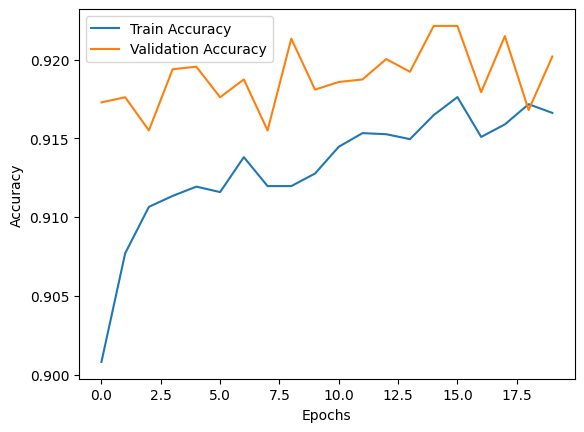

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build neural network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# compile model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate on test set
nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {nn_test_accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy') # The accuracy for the training set recorded during each epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # The accuracy for the validation set recorded during each epoch.
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Random Forest Model

Random Forest Test Accuracy: 0.9075902249554945


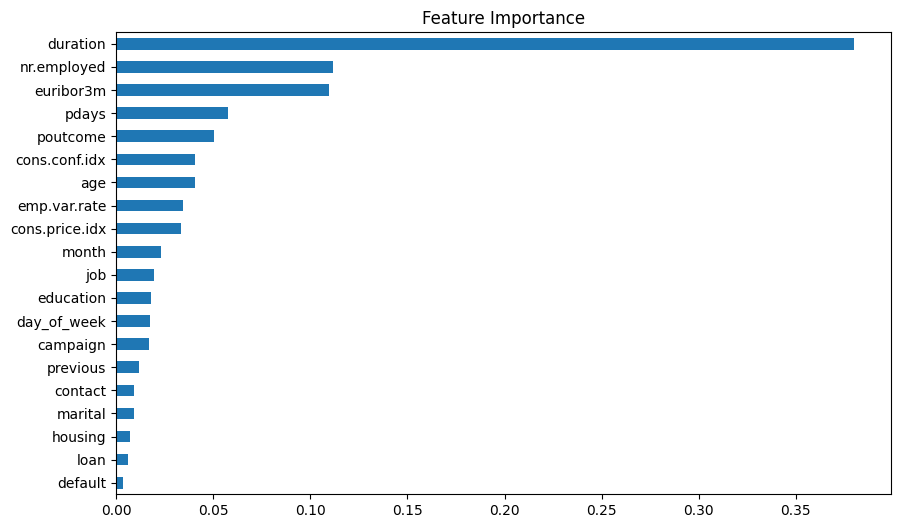

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Build random forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on test set
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Test Accuracy: {rf_accuracy}")

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


Evaluation Metrics

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5432
           1       0.71      0.40      0.51       747

    accuracy                           0.91      6179
   macro avg       0.82      0.69      0.73      6179
weighted avg       0.90      0.91      0.90      6179

Random Forest ROC-AUC: 0.9435584754333978
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5432
           1       0.68      0.47      0.55       747

    accuracy                           0.91      6179
   macro avg       0.80      0.72      0.75      6179
weighted avg       0.90      0.91      0.90      6179

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network ROC-AUC: 0.9422424602681714


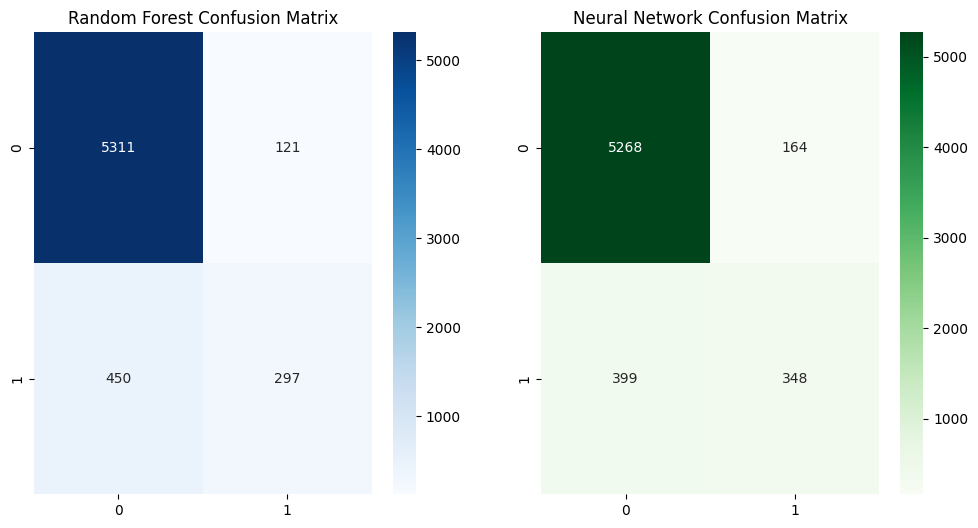

In [7]:
# Neural Network predictions
nn_y_pred = (nn_model.predict(X_test) > 0.5).astype(int)

# Random Forest metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])}")

# Neural Network metrics
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_y_pred))
print(f"Neural Network ROC-AUC: {roc_auc_score(y_test, nn_model.predict(X_test))}")

# Confusion Matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, nn_y_pred), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("Neural Network Confusion Matrix")
plt.show()
